# Libraries

In [10]:
import sys
sys.path.append("../")

In [25]:
# for working with data
import pandas as pd
import numpy as np
from src.data_exploration import explore_functions as explr

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

# Load Data

In [19]:
data = pd.read_csv("../data/org_taiwan.csv")
data = data[["id", "default"] + list(data.columns[1:-1:])]
print(f"Data contains {data.shape[0]} observations and {data.shape[1]-2} features.")
data

Data contains 30000 observations and 23 features.


,id,default,limit_bal,sex,education,marriage,age,status_sep,status_aug,status_jul,status_jun,status_may,status_apr,billamt_sep,billamt_aug,billamt_jul,billamt_jun,billamt_may,billamt_apr,payamt_sep,payamt_aug,payamt_jul,payamt_jun,payamt_may,payamt_apr
0,1,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,1,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,0,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,0,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,0,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,0,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,1,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,1,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# Data Exploration

### Balance Of Target
Data is imbalanced

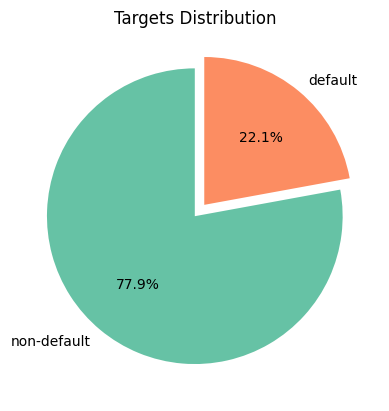

In [27]:
def check_balance(data, target, chart_types="pie", normalize=True, positive_target=0):
    target_counts = data[target].value_counts()
    target_counts.index = ["non-default" if i==positive_target else "default" for i in target_counts.index] 
    # sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index)
    if chart_types == "pie":
        plt.pie(target_counts.values, labels=target_counts.index, normalize=normalize, startangle=90,
            autopct="%1.1f%%", explode=[0, 0.1])
    elif chart_types == "bar":
        sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette="tab10")
        plt.xlabel("Targets")
    plt.title("Targets Distribution")

check_balance(data, "default")

### Basic Information

* Number of rows
* Number of columns
* Number of duplicated rows
* Number of features at each dtypes

In [32]:
explr.data_explore(data)

,info
Rows,30000
Features,25
Duplicate Rows,0
int64,22
object,3


### Check Missing Values

In [38]:
data.isnull().sum()

id             0
default        0
limit_bal      0
sex            0
education      0
marriage       0
age            0
status_sep     0
status_aug     0
status_jul     0
status_jun     0
status_may     0
status_apr     0
billamt_sep    0
billamt_aug    0
billamt_jul    0
billamt_jun    0
billamt_may    0
billamt_apr    0
payamt_sep     0
payamt_aug     0
payamt_jul     0
payamt_jun     0
payamt_may     0
payamt_apr     0
dtype: int64

### Categorical Features

In [39]:
cate = data.select_dtypes(include="object")
explr.multi_features_explore(cate)

index,dtype,nonnull,%nonnull,nan,%nan,nunique,nunique_nan,unique,frequency,%value,most
sex,object,30000,1.0,0,0.0,2,2,"[female, male]","{'female': 18112, 'male': 11888}","{'female': 0.6, 'male': 0.4}",[female]
education,object,30000,1.0,0,0.0,4,4,"[university, graduate school, high school, others]","{'university': 14030, 'graduate school': 10585, 'high school': 4917, 'others': 468}","{'university': 0.47, 'graduate school': 0.35, 'high school': 0.16, 'others': 0.02}",[university]
marriage,object,30000,1.0,0,0.0,3,3,"[married, single, others]","{'single': 15964, 'married': 13659, 'others': 377}","{'single': 0.53, 'married': 0.46, 'others': 0.01}",[single]


In [47]:
def distribution_barplot(data, feature, normalize=True, title=None, legend="auto", labels=None):
    feature_count = data[feature].value_counts(normalize=normalize).reset_index()
    if labels is not None:
        feature_count["new_labels"] = feature_count[feature].apply(lambda x: labels[x])
        sns.barplot(x=feature_count[feature], y=feature_count.iloc[:, 1], hue=feature_count.iloc[:, -1],
                    palette="Set2", legend=legend)
    else:
        sns.barplot(x=feature_count[feature], y=feature_count.iloc[:, 1], hue=feature_count.iloc[:, 0],
                    palette="Set2", legend=legend)      
    plt.xlabel(feature)
    if title is None:
        plt.title(f"Distribution of {feature.capitalize()}")
    else:
        plt.title(title)

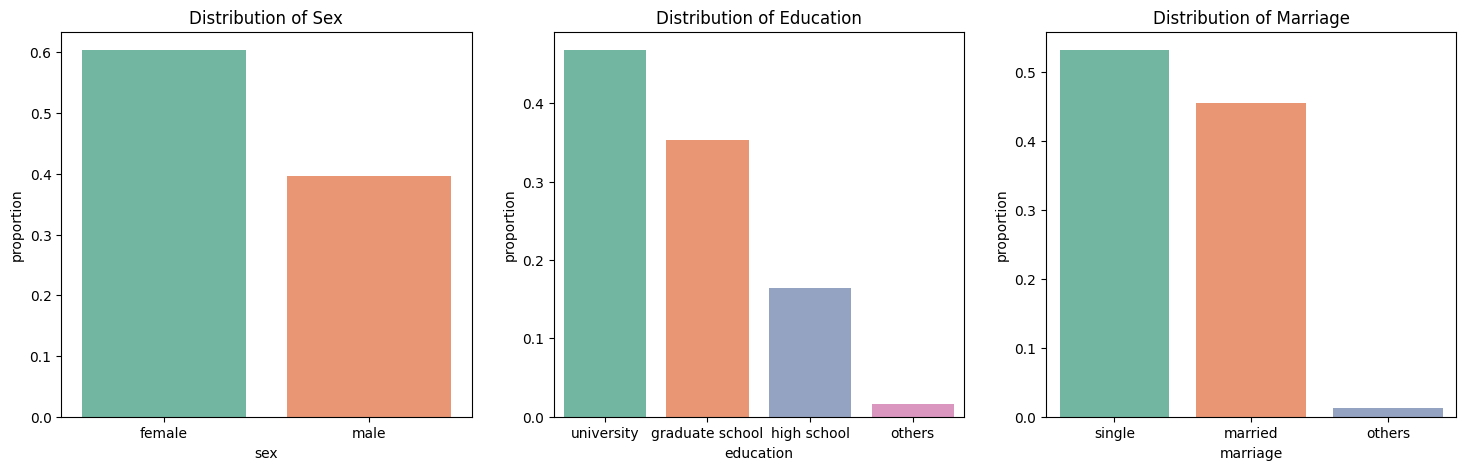

In [57]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    distribution_barplot(data, feature=cate.columns[i], normalize=True)

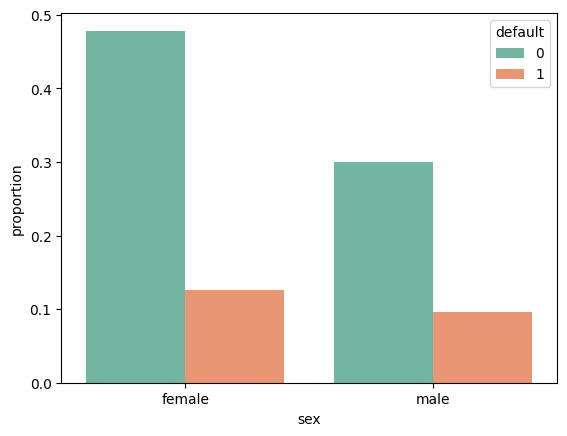

In [69]:
def distitribution_otherbased(data, dist_feature, base_feature, normalize=False):
    count = data[[dist_feature, base_feature]].value_counts(normalize=normalize).reset_index()
    sns.barplot(x=count[base_feature], y=count.iloc[:, -1], hue=count[dist_feature])

distitribution_otherbased(data, dist_feature="default", base_feature="sex", normalize=True)

In [ ]:
def check_balance(data, target, chart_types="pie", normalize=True, positive_target=0):
    target_counts = data[target].value_counts()
    target_counts.index = ["non-default" if i==positive_target else "default" for i in target_counts.index] 
    # sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index)
    if chart_types == "pie":
        plt.pie(target_counts.values, labels=target_counts.index, normalize=normalize, startangle=90,
            autopct="%1.1f%%", explode=[0, 0.1])
    elif chart_types == "bar":
        sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette="tab10")
        plt.xlabel("Targets")
    plt.title("Distribution of Targets")
    plt.show()

def distribution_barplot(data, feature, normalize=True, title=None, legend="auto", labels=None):
    feature_count = data[feature].value_counts(normalize=normalize).reset_index()
    if labels is not None:
        feature_count["new_labels"] = feature_count[feature].apply(lambda x: labels[x])
        sns.barplot(x=feature_count[feature], y=feature_count.iloc[:, 1], hue=feature_count.iloc[:, -1],
                    palette="Set2", legend=legend)
    else:
        sns.barplot(x=feature_count[feature], y=feature_count.iloc[:, 1], hue=feature_count.iloc[:, 0],
                    palette="Set2", legend=legend)      
    plt.xlabel(feature)
    if title is None:
        plt.title(f"Distribution of {feature.capitalize()}")
    else:
        plt.title(title)

def distitribution_otherbased(data, dist_feature, base_feature, normalize=False):
    dist = data.groupby(by=base_feature, as_index=False)[dist_feature].value_counts(normalize=normalize)
    sns.barplot(x=dist[base_feature], y=dist.iloc[:, -1], hue=dist[dist_feature])